# Explaining Models with Shap

# 1 Preliminary Steps

## 1.1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import shap
shap.initjs()

## 1.2 Load Data

In [2]:
# load saved joblib file
loaded_joblib = joblib.load('best-models.joblib')

# check
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [3]:
# save variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
rf = loaded_joblib['RandomForestRegressor']

# 2 Random Forest Model with SHAP

- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
    - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
        - Are they the same features in both? If not, what's different?
    - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

- Create a second summary plot - with plot_type='dot'
    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

## 2.1 Prepare Data

In [4]:
# how many rows do we have in our training data?
len(X_train_df)

6392

In [5]:
# save 400 rows with shap.sample() from X_train_df and y_train
X_shap = shap.sample(X_train_df, 
                     nsamples = 400, 
                     random_state = 42)

y_shap = y_train.loc[X_shap.index]

# check
display(X_shap.head())
print(y_shap)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2937,8.365,0.039811,191.3188,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6371,9.695,0.030414,221.3114,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3762,17.250,0.000000,37.5822,1998.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,19.000,0.027139,127.3336,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8475,18.600,0.080627,92.5436,1999.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


2937    2285.0256
6371    2217.1140
3762     196.4110
419     2940.1728
8475     378.1744
          ...    
5381    2841.6344
4918    3175.8660
1299    2960.1468
8096    1163.8184
2228     969.4048
Name: Item_Outlet_Sales, Length: 400, dtype: float64


## 2.2 SHAP Explainer and Values

In [6]:
# create shap.explainers.Tree explainer
explainer = shap.Explainer(rf)

# check
explainer

In [7]:
# get shap values from explainer for training data
shap_values = explainer(X_shap, y_shap)

# check
type(shap_values)

shap._explanation.Explanation

In [8]:
# check shap_values in dataframe
pd.DataFrame(shap_values.values, columns = X_shap.columns)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.838621,1.862463,784.038131,-38.203081,0.328681,0.087182,-0.030623,-0.293165,-0.064940,0.086790,...,0.186887,-0.296054,0.133511,-20.810425,0.0,0.0,0.0,470.298753,-22.870663,-103.005033
1,0.899916,5.063998,1173.750298,264.656308,0.459066,0.075416,0.002785,-0.224379,-0.068228,0.092057,...,0.309606,-0.030740,0.078355,142.095590,0.0,0.0,0.0,-642.664741,154.486826,-114.243716
2,0.046884,5.341438,-963.059282,-82.381120,-0.164200,0.039158,-0.020372,-0.088173,-0.085235,0.074685,...,0.109728,-0.030740,-0.166456,-55.075783,0.0,0.0,0.0,-656.677073,-59.846503,-75.169829
3,-0.109549,2.649861,-233.545782,29.421778,-0.118411,0.028310,0.013495,-0.088173,-0.068223,0.117282,...,0.186887,-0.052452,-0.283633,-18.906873,0.0,0.0,0.0,331.621656,-19.834620,-83.074257
4,-0.107281,-2.680027,-761.225460,-26.651037,-0.115149,0.075067,0.013776,-0.088173,-0.247195,0.085491,...,0.186887,0.253075,0.133511,20.541905,0.0,0.0,0.0,266.232756,-19.390110,-79.205442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.002759,-7.174101,-209.953861,-27.730347,-0.106888,0.028310,0.013000,-0.088173,-0.064936,0.113056,...,0.186887,-0.052452,-0.283633,-18.911463,0.0,0.0,0.0,378.289294,-20.140557,-82.035688
396,0.283806,1.255277,541.895052,-38.498292,-0.156108,0.007217,0.007866,-0.290475,-0.068276,0.174449,...,-0.764850,-0.296054,0.133511,-20.521525,0.0,0.0,0.0,443.763652,-22.613064,-105.717197
397,0.283806,1.953010,422.715486,-37.671893,-0.460720,-0.018266,0.021446,-0.106901,-0.072361,0.135692,...,-0.764850,-0.296054,0.133511,-20.179853,0.0,0.0,0.0,440.513397,-22.348081,-82.399478
398,0.304674,2.087873,-1391.684618,26.343898,0.312437,0.018097,0.028639,-0.088173,-0.088139,0.070907,...,0.186887,-0.052452,0.133511,-14.950559,0.0,0.0,0.0,228.237216,-16.069308,-68.178838


## 2.3 Bar Summary Plot

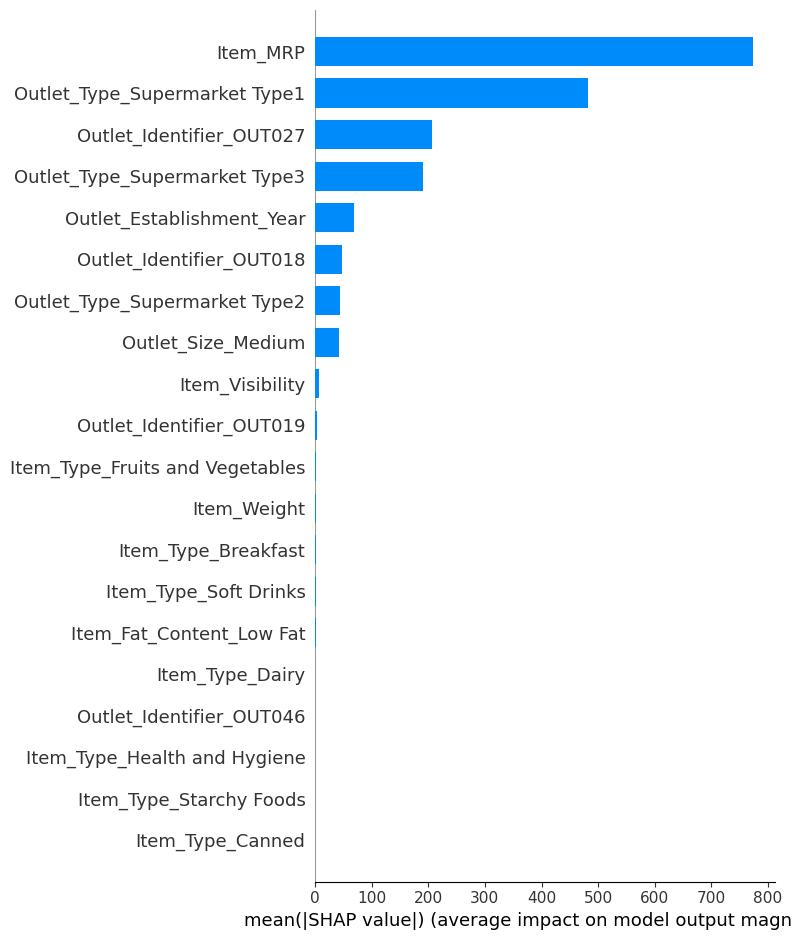

In [9]:
# plot and save
fig, ax = plt.subplots()
shap.summary_plot(shap_values, 
                 features = X_shap, 
                 plot_type = 'bar')
ax.set_title('Random Forest SHAP Summary Bar Plot')
fig.savefig('Images/shap_rf_bar_summary_plot.png',
           bbox_inches = 'tight');

In [18]:
# display top 5 feature importances from random forest model

!["Feature Importances"](Images/random_forest_regression_top_5_feature_importances.png)

The SHAP bar summary plot identified the same top five features that the random forest model relied on. 

## 4.4 Dot Summary Plot

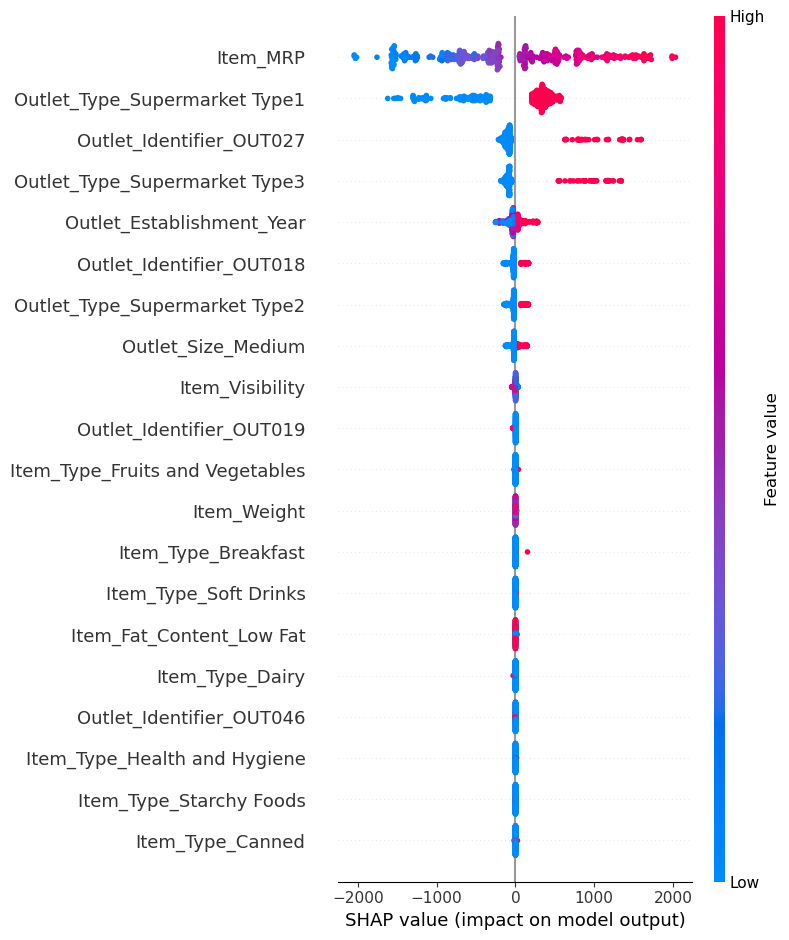

In [29]:
# plot and save
fig, ax = plt.subplots()
shap.summary_plot(shap_values, 
                 features = X_shap, 
                 plot_type = 'dot')
ax.set_title('Random Forest SHAP Summary Dot Plot')
fig.savefig('Images/shap_rf_dot_summary_plot.png',
           bbox_inches = 'tight');

The top three most important features identified by the SHAP dot plot above are:

1. **'Item_MRP':** High prices (identified in red) are driving the SHAP values for rows up, meaning that they are pushing up the total sales number in that row. The reverse is true for low prices (in blue). There looks to be a very orderly spread of high-, mid-, and low-value items directing the final sales.


2. **'Outlet_Type_Supermarket Type1':** The rows that belong to this categorical variable (in red) all show up on the positive side, meaning they are driving up final sales numbers. The rows that belong to other values in this category contribute to lower final sales.


3. **'Outlet_Identifier_OUT027':** This particular outlet, with rows identified in red, is associated with higher final sales. Other outlets have lower sales.